Ahmad Bhatti (mab558), Joshua Hong (jh976), Catherine Cai (cc2563)

In [149]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.metrics import r2_score

# Problem
This project is focused on determining if it is difficult to graduate from selective colleges (low admission rate) and do you earn more if you attench such a college. The project analyzes this by looking at the average testing scores, completion rates, and average earnings for graduates.

# Hypothesis
The current hypothesis is that the if average testing scores are higher, completion rates would be in fact be higher, and those graduating from more “selective” colleges will have higher average earnings.

In [150]:
#Dataset of Colleges and associated information
df=pd.read_csv('Most-Recent-Cohorts-All-Data-Elements.csv')
df.head(10)

C:\Users\Ahmad\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (6,9,1608,1619,1620,1621,1622,1623,1624,1625,1626,1627,1628,1629,1640,1643,1648,1657,1666,1669,1674,1683,1688,1689,1690,1691,1692,1697,1700,1703,1704,1705,1706,1707,1725,1726,1727,1728,1729,1743,1815,1816,1817,1818,1823,1824,1830,1831,1879,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,1890,1891,1892,1893,1894,1895,1896,1897,1898,1909,1910,1911,1912,1913,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,...,OMENRUP_FULLTIME_POOLED_SUPP,OMENRYP_PARTTIME_POOLED_SUPP,OMENRAP_PARTTIME_POOLED_SUPP,OMAWDP8_PARTTIME_POOLED_SUPP,OMENRUP_PARTTIME_POOLED_SUPP,FTFTPCTPELL,FTFTPCTFLOAN,UG12MN,G12MN,SCUGFFN
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools C...,www.aamu.edu/,https://galileo.aamu.edu/NetPriceCalculator/np...,...,0.2216,0.0222,0.4523,0.2062,0.3193,0.7057,0.7143,5343.0,1165.0,1288.0
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,Southern Association of Colleges and Schools C...,www.uab.edu,uab.studentaidcalculator.com/survey.aspx,...,0.1237,0.0969,0.2377,0.4179,0.2475,0.3788,0.5350,14445.0,10498.0,2228.0
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,Southern Association of Colleges and Schools C...,www.amridgeuniversity.edu,www2.amridgeuniversity.edu:9091/,...,0.4419,0.0299,0.2239,0.4627,0.2836,1.0000,1.0000,440.0,527.0,5.0
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,Southern Association of Colleges and Schools C...,www.uah.edu,finaid.uah.edu/,...,0.1449,0.0292,0.3841,0.3371,0.2496,0.2707,0.4556,8145.0,2443.0,1341.0
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,Southern Association of Colleges and Schools C...,www.alasu.edu,www.alasu.edu/cost-aid/forms/calculator/index....,...,0.2005,0.0485,0.4757,0.2136,0.2621,0.7792,0.7539,4732.0,642.0,951.0
5,100751,105100,1051,The University of Alabama,Tuscaloosa,AL,35487-0166,Southern Association of Colleges and Schools C...,www.ua.edu/,financialaid.ua.edu/net-price-calculator/,...,0.067,0.0143,0.3085,0.4317,0.2455,0.1656,0.4145,36237.0,6331.0,7351.0
6,100760,100700,1007,Central Alabama Community College,Alexander City,AL,35010,Southern Association of Colleges and Schools C...,www.cacc.edu,https://www.cacc.edu/net-price-calculator/,...,0.4246,0.009,0.3506,0.2495,0.3909,0.5817,0.1748,2417.0,NaN,349.0
7,100812,100800,1008,Athens State University,Athens,AL,35611,Southern Association of Colleges and Schools C...,www.athens.edu,https://24.athens.edu/apex/prod8/f?p=174:1:394...,...,0.1828,0.0168,0.2084,0.499,0.2757,NaN,NaN,3947.0,165.0,0.0
8,100830,831000,8310,Auburn University at Montgomery,Montgomery,AL,36117-3596,Southern Association of Colleges and Schools C...,www.aum.edu,www.aum.edu/current-students/financial-informa...,...,0.273,0.0341,0.3636,0.2143,0.388,0.5183,0.5518,5246.0,787.0,627.0
9,100858,100900,1009,Auburn University,Auburn,AL,36849,Southern Association of Colleges and Schools C...,www.auburn.edu,https://www.auburn.edu/admissions/costcalc/fre...,...,0.0541,0.0175,0.391,0.4185,0.1729,0.1409,0.3039,25195.0,6650.0,4771.0


In [151]:
print(df.columns)

Index(['UNITID', 'OPEID', 'OPEID6', 'INSTNM', 'CITY', 'STABBR', 'ZIP',
       'ACCREDAGENCY', 'INSTURL', 'NPCURL',
       ...
       'OMENRUP_FULLTIME_POOLED_SUPP', 'OMENRYP_PARTTIME_POOLED_SUPP',
       'OMENRAP_PARTTIME_POOLED_SUPP', 'OMAWDP8_PARTTIME_POOLED_SUPP',
       'OMENRUP_PARTTIME_POOLED_SUPP', 'FTFTPCTPELL', 'FTFTPCTFLOAN', 'UG12MN',
       'G12MN', 'SCUGFFN'],
      dtype='object', length=1982)


## Admission Rate Histogram
Plotting a histogram of admission rates of all the colleges helps get a better picture of how the distribution of selective colleges spreads across the country

C:\Users\Ahmad\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Ahmad\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


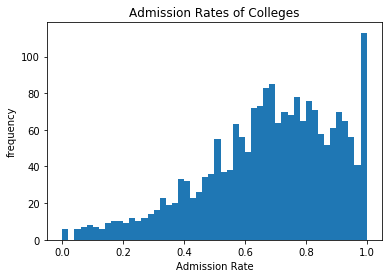

In [152]:
#ADM_RATE is the admission rate of each college
plt.hist(df['ADM_RATE'],bins=50)
# Add a title
plt.title('Admission Rates of Colleges')
# Add x and y labels
plt.xlabel('Admission Rate')
plt.ylabel('frequency')
# Show the plot!
plt.show()

The data seems to be skewed to the left, suggesting that there are few selective colleges as compared to the majority colleges who are more open to admissions. The histogram above shows that majority of the data falls within the 50% - 100% admission rate range

# Average SAT scores Histogram
The average SAT scores of students is displayed to determine where majority of the data lies and how far is it spread. 

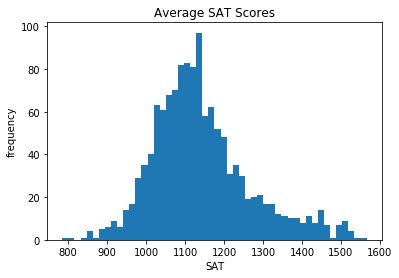

In [153]:
#Average SAT scores of students in colleges
plt.hist(df['SAT_AVG'],bins=50)
# Add a title
plt.title('Average SAT Scores')
# Add x and y labels
plt.xlabel('SAT')
plt.ylabel('frequency')
# Show the plot!
plt.show()

The histogram shows that majority of the data falls between 1050-1150 range, further supporting the aforementioned conclusion that most colleges in the US are not that selective and, hence, not that strict about SAT scores of students during the time of admission. 

# Histogram of mean earnings after graduation
The mean earnings of students graduating from specific colleges is displayed in a histogram with the exception of certain colleges who did not wish not provide such information or such information was not readily available. 

In [154]:
#Check value type of mean earnings of students working and not enrolled ten years after enrolling
print(type(df['MN_EARN_WNE_P10'][0]))
#Check for any unique values e.g. NaN
print(df['MN_EARN_WNE_P10'].unique())

<class 'str'>
['35500' '48400' '47600' '52000' '30600' '51600' '32400' '42400' '38000'
 '56300' '53100' '31300' '40200' '42700' '33900' '40700' '30200' nan
 '29800' '34800' '27300' '41600' '43600' 'PrivacySuppressed' '27600'
 '38100' '33800' '32200' '29300' '26600' '40400' '32000' '49800' '29500'
 '38700' '36100' '30800' '42800' '31700' '37400' '26800' '28300' '59800'
 '31100' '30700' '46800' '51300' '33700' '23900' '28000' '41100' '42200'
 '51200' '45100' '39500' '45300' '45600' '46400' '24500' '27200' '26400'
 '18800' '37800' '23700' '55500' '56000' '32600' '31500' '22600' '34300'
 '22000' '23000' '35700' '70300' '38300' '58500' '39000' '41500' '32900'
 '23400' '44600' '48100' '36000' '26200' '35000' '45000' '43400' '29000'
 '42500' '33400' '34900' '20200' '34000' '69000' '25100' '16400' '44800'
 '19000' '19600' '52700' '36600' '38600' '35800' '18500' '29100' '43000'
 '29600' '23800' '22300' '28100' '30300' '47000' '44500' '55400' '23600'
 '26700' '19200' '28900' '32500' '46000' '310

In [155]:
#Drop rows with 'PrivacySuppressed' values in earnings
df_earnings = df[df.MN_EARN_WNE_P10 != 'PrivacySuppressed']
#Drop NaN values in earnings
df_earnings = df_earnings.dropna(subset=['MN_EARN_WNE_P10'])
#Cast string values of earnings to floats
df_earnings['MN_EARN_WNE_P10'] = df_earnings['MN_EARN_WNE_P10'].astype(float)

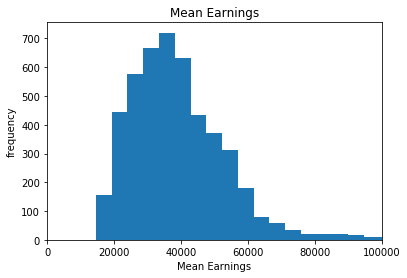

In [156]:
#Mean earnings of students working and not enrolled ten years after enrolling
plt.hist(df_earnings['MN_EARN_WNE_P10'],bins=50)
# Add a title
plt.title('Mean Earnings')
# Add x and y labels
plt.xlabel('Mean Earnings')
plt.ylabel('frequency')
#Limit X axis for better representation of majority data 
plt.xlim(0,100000)
# Show the plot!
plt.show()


This histogram is skewed to the right with majority of the data falling between the 22,000 - 42,000 range. Limits were set to the x-axis to get a clearer picture of the histogram as there were some data points that far exceeded 100,000 earnings!

# 3D Scatter Plot of Admission Rate, SAT Average, and Cost of Attendance
A scatter plot will help visualize where on the axes mentioned above does each college fall in. 

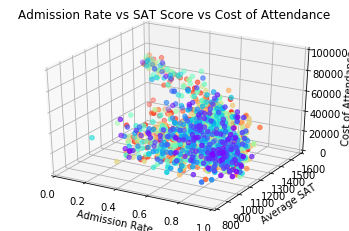

In [157]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.set_xlim3d(0, 1)
ax.set_ylim3d(800,1600)  # based on histogram results
ax.set_zlim3d(0,100000)

colors= cm.rainbow(np.linspace(1,0,1287))
ax.scatter(df['ADM_RATE'],df['SAT_AVG'],df['COSTT4_A'], c=colors)
ax.set_title('Admission Rate vs SAT Score vs Cost of Attendance')
ax.set_xlabel('Admission Rate')
ax.set_ylabel('Average SAT')
ax.set_zlabel('Cost of Attendance')

plt.show()

The scatter plot shows that majority colleges with high admission rate and 1100-1200 SAT Averages have a cost of attendance between 200,000 and 400,000 while more selective colleges have a higher cost of attendance. 

In [158]:
#Dataframe of admission rate and completion rate
df_1 = df[['ADM_RATE', 'C150_4_POOLED']]
#Dataframe of admission rate and SAT average
df_2 = df[['ADM_RATE', 'SAT_AVG']]
#Dataframe of completion rate and SAT average
df_3 = df[['C150_4_POOLED', 'SAT_AVG']]
#Dataframe of admission rate and mean earnings
df_4 = df_earnings[['ADM_RATE', 'MN_EARN_WNE_P10']]

In [159]:
#Drop rows with NaN values
df_1 = df_1.dropna()
df_2 = df_2.dropna()
df_3 = df_3.dropna()
df_4 = df_4.dropna()

In [160]:
#ADMISSION RATE AND COMPLETION RATE
feature = df_1[['ADM_RATE']]
target = df_1[['C150_4_POOLED']]
model = LinearRegression()

In [161]:
feature_train, feature_test, target_train, target_test = train_test_split(feature,target,test_size=0.2)

In [162]:
model.fit(feature_train, target_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [163]:
predictions = model.predict(feature_test)

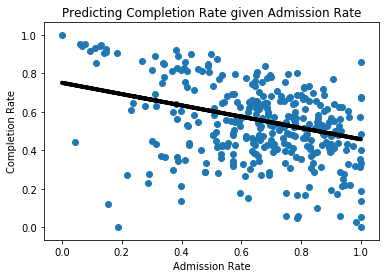

In [164]:
plt.scatter(feature_test, target_test)
plt.xlabel("Admission Rate")
plt.ylabel("Completion Rate")
plt.title("Predicting Completion Rate given Admission Rate")
plt.plot(feature_test, predictions, 'k', linewidth=4)

plt.show()

In [165]:
print("Accuracy Score: {:.3f}".format(model.score(feature_test, target_test)))

Accuracy Score: 0.126


__Conclusion__: The scatter plot suggests that the less selective the school, the lower the completion rate, which is contrary to our hypothesis. The regression line further suggests that as the admission rate becomes higher the completion rate drops. One of the reason why this may be is because selective schools may be picky in their admissions and ensure enrolling students who are high achievers while other colleges might be open to a wide range of students who may or may not graduate from college. Nevertheless, the model score of 0.126 shows that the relation between these two variables is not that strong and their may be other reasons that could explain the variability of completion rate.

In [166]:
#ADMISSION RATE AND SAT AVERAGE
feature = df_2[['ADM_RATE']]
target = df_2[['SAT_AVG']]
model = LinearRegression()

In [167]:
feature_train, feature_test, target_train, target_test = train_test_split(feature,target,test_size=0.2)

In [168]:
model.fit(feature_train, target_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [169]:
predictions = model.predict(feature_test)

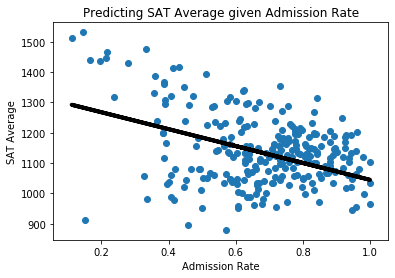

In [170]:
plt.scatter(feature_test, target_test)
plt.xlabel("Admission Rate")
plt.ylabel("SAT Average")
plt.title("Predicting SAT Average given Admission Rate")
plt.plot(feature_test, predictions, 'k', linewidth=4)

plt.show()

In [171]:
print("Accuracy Score: {:.3f}".format(model.score(feature_test, target_test)))

Accuracy Score: 0.117


__Conclusion__: The scatter plot suggests that the more selective a school, the higher the SAT averages, which supports our hypothesis! This means that colleges with a lower admission rate look for better SAT scores when deciding to enroll students. The regression line supports this claim as well. Nevertheless, the accuracy score of 0.117 suggests that there are more factors that explain the variability in the SAT Averages of colleges and it may not entirely based on the admission rate. 

In [172]:
#SAT AVERAGE AND COMPLETION RATE
feature = df_3[['SAT_AVG']]
target = df_3[['C150_4_POOLED']]
model = LinearRegression()

In [173]:
feature_train, feature_test, target_train, target_test = train_test_split(feature,target,test_size=0.2)

In [174]:
model.fit(feature_train, target_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [175]:
predictions = model.predict(feature_test)

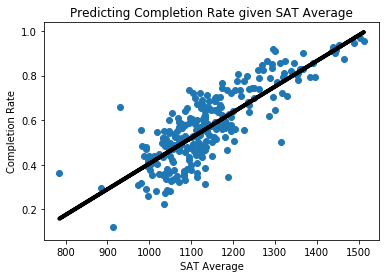

In [176]:
plt.scatter(feature_test, target_test)
plt.xlabel("SAT Average")
plt.ylabel("Completion Rate")
plt.title("Predicting Completion Rate given SAT Average")
plt.plot(feature_test, predictions, 'k', linewidth=4)

plt.show()

In [177]:
print("Accuracy Score: {:.3f}".format(model.score(feature_test, target_test)))

Accuracy Score: 0.669


__Conclusion__: Plotting a scatter plot for Completion Rate given SAT Averages strongly suggests that colleges with students with higher SAT Averages have a higher completion rate. A regression score of 0.669 suggests that SAT Averages significantly impact the completion rate of colleges. 

In [178]:
#ADMISSION RATE AND MEAN EARNINGS
feature = df_4[['ADM_RATE']]
target = df_4[['MN_EARN_WNE_P10']]
model = LinearRegression()

In [179]:
feature_train, feature_test, target_train, target_test = train_test_split(feature,target,test_size=0.2)

In [180]:
model.fit(feature_train, target_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [181]:
predictions = model.predict(feature_test)

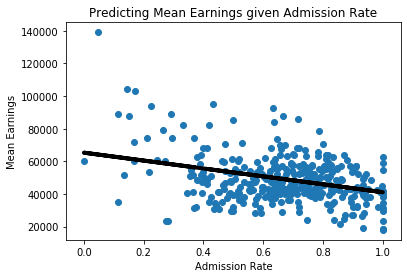

In [182]:
plt.scatter(feature_test, target_test)
plt.xlabel("Admission Rate")
plt.ylabel("Mean Earnings")
plt.title("Predicting Mean Earnings given Admission Rate")
plt.plot(feature_test, predictions, 'k', linewidth=4)

plt.show()

In [183]:
print("Accuracy Score: {:.3f}".format(model.score(feature_test, target_test)))

Accuracy Score: 0.136


__Conclusion__: A scatter plot of mean earnings and admission rate shows that selective colleges have graduated students with higher mean earnings, which supports our conclusion! The regression line with a negative slopes further supports this conclusion. Colleges with lower admission rates eventually lead to students with higher mean earnings. However, a model accuracy score of 0.136 undermines this hypothesis to some extent because the mean earnings are not completely explained by the scale of admission rates of colleges. 